In [5]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
from sklearn.preprocessing import LabelEncoder

# Шаг 1. Загрузим данные
boston = fetch_openml(name="house_prices", as_frame=True)
df = boston.frame

# Шаг 2. Проверим, сколько пропущенных значений в каждой колонке
print(df.isnull().sum())

# Шаг 3. Разделим данные на числовые и категориальные
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Шаг 4. Заполним пропуски
# Для числовых данных - медианой
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
# Для категориальных данных - самым частым значением (модой)
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Шаг 5. Обработаем строковые (категориальные) данные
# Преобразуем строковые данные в числовые с помощью LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Шаг 6. Выделим признаки и целевую переменную
X = df.drop(columns=["SalePrice"])  # Признаки (все колонки, кроме цены)
y = df["SalePrice"]  # Целевая переменная (цена дома)

# Шаг 7. Разделим данные на тренировочную и тестовую выборки в соотношении 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Шаг 8. Обучим модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Шаг 9. Сделаем предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Шаг 10. Оценим качество модели с помощью метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # для текущих версий
# Если версия sklearn 1.5 и выше, используйте это:
# from sklearn.metrics import root_mean_squared_error
# rmse = root_mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

# Выводим результаты
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Mean Absolute Error (MAE): 22039.4072512751
Mean Squared Error (MSE): 1122209991.234332
Root Mean Squared Error (RMSE): 33499.402848921534
R-squared (R2): 0.8391810099319625


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


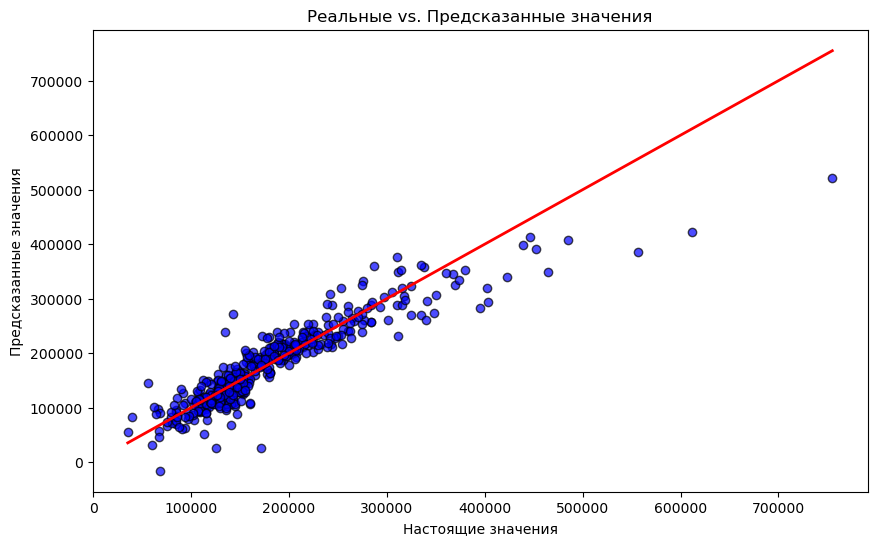

In [7]:
import matplotlib.pyplot as plt

# График реальных и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue", edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.title("Реальные vs. Предсказанные значения")
plt.show()


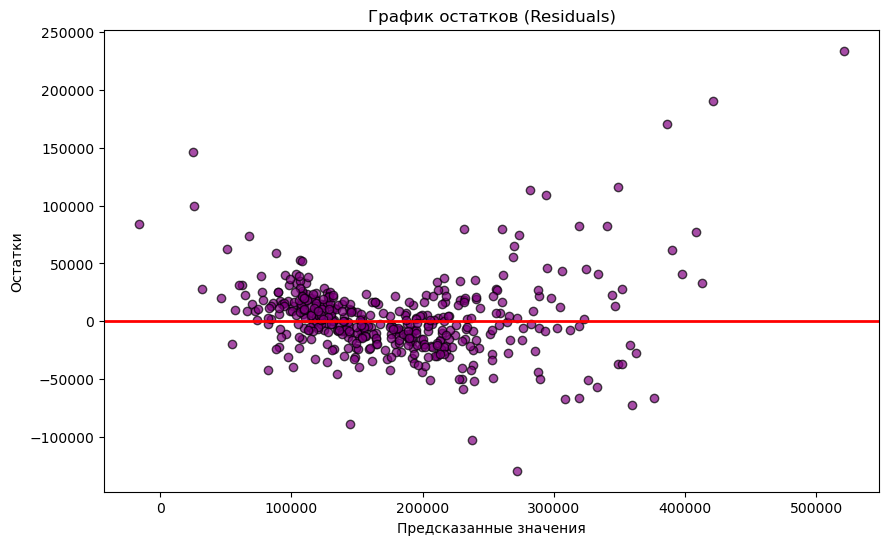

In [8]:
import matplotlib.pyplot as plt

# Остатки
residuals = y_test - y_pred

# График остатков
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color="purple", edgecolor='k', alpha=0.7)
plt.axhline(y=0, color="red", lw=2)
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков (Residuals)")
plt.show()


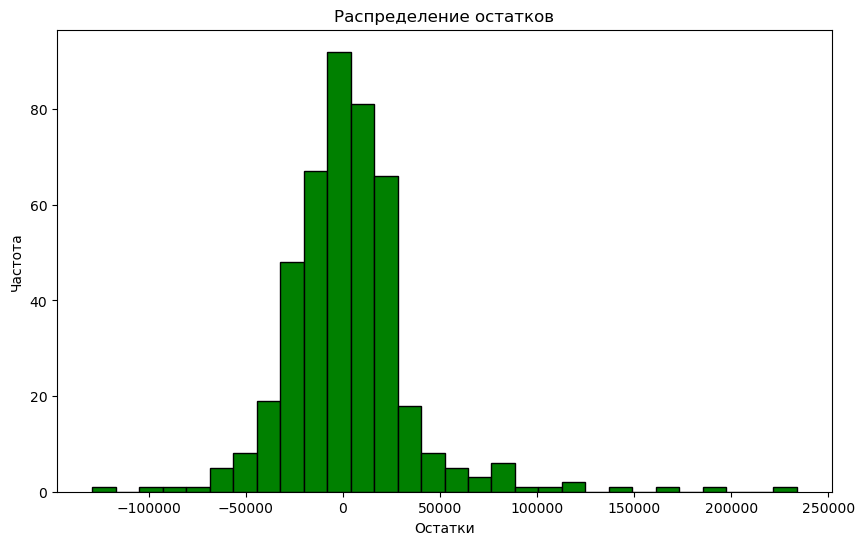

In [9]:
import matplotlib.pyplot as plt

# Гистограмма остатков
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color="green", edgecolor="black")
plt.title("Распределение остатков")
plt.xlabel("Остатки")
plt.ylabel("Частота")
plt.show()


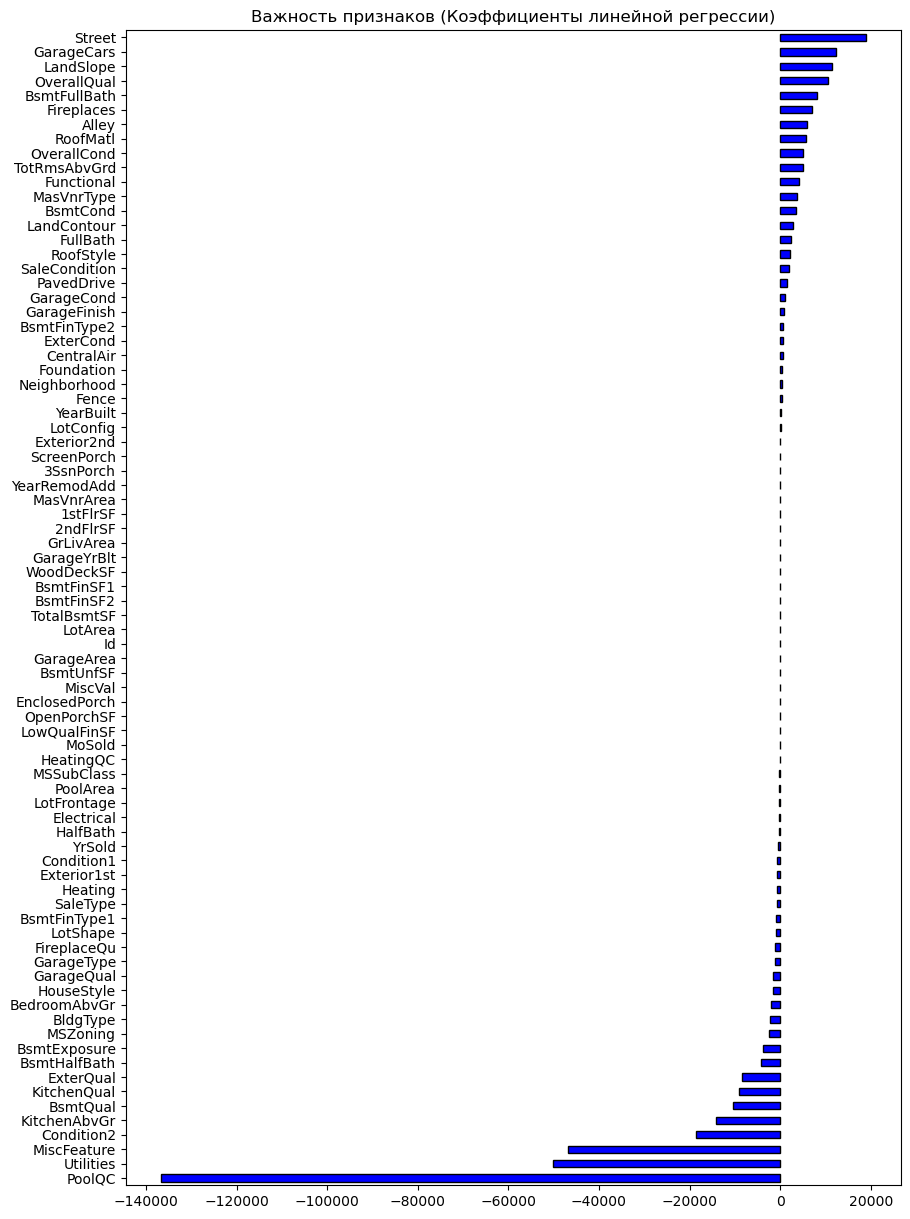

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Важность признаков (коэффициенты линейной регрессии)
coef = pd.Series(model.coef_, index=X.columns)

plt.figure(figsize=(10, 15))
coef.sort_values().plot(kind="barh", color="blue", edgecolor="black")
plt.title("Важность признаков (Коэффициенты линейной регрессии)")
plt.show()


In [16]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,2,2,2,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,2,2,2,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,2,2,2,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,2,2,2,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,2,2,2,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,0,3,3,0,...,0,2,2,2,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,0,3,3,0,...,0,2,2,2,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,0,3,3,0,...,0,2,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,0,3,3,0,...,0,2,2,2,0,4,2010,8,4,142125


In [26]:
#ниже все для создания презентации 

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


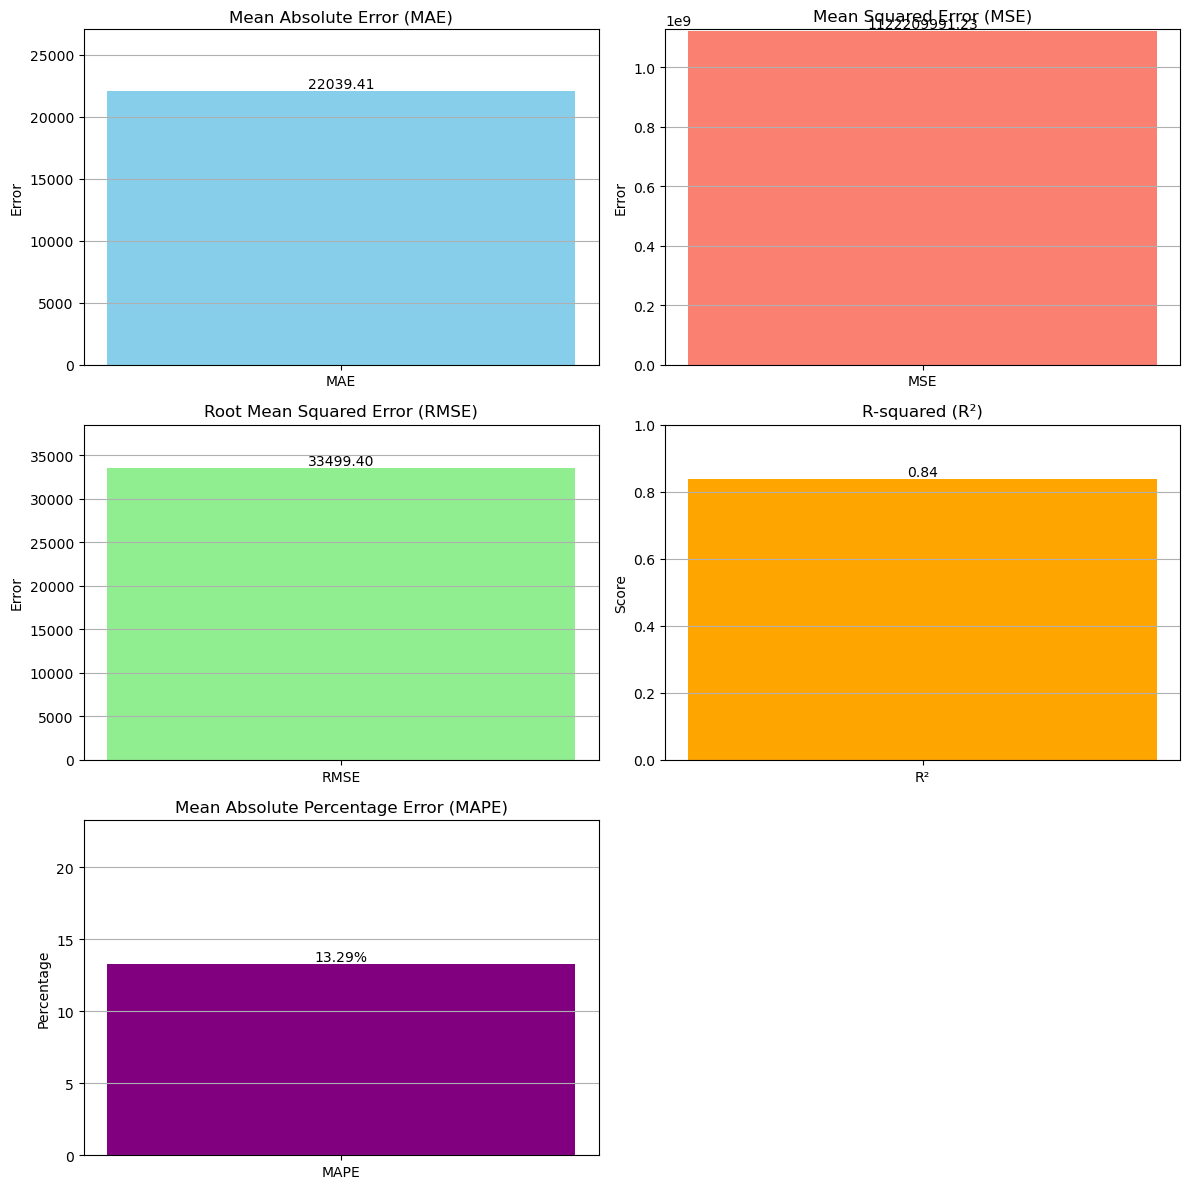

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Создание фигуры и осей
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# 1. MAE
axs[0, 0].bar(['MAE'], [mae], color='skyblue')
axs[0, 0].set_title('Mean Absolute Error (MAE)')
axs[0, 0].set_ylabel('Error')
axs[0, 0].set_ylim(0, mae + 5000)  
axs[0, 0].grid(axis='y')
axs[0, 0].text(0, mae, f'{mae:.2f}', ha='center', va='bottom')

# 2. MSE
axs[0, 1].bar(['MSE'], [mse], color='salmon')
axs[0, 1].set_title('Mean Squared Error (MSE)')
axs[0, 1].set_ylabel('Error')
axs[0, 1].set_ylim(0, mse + 6000000) 
axs[0, 1].grid(axis='y')
axs[0, 1].text(0, mse, f'{mse:.2f}', ha='center', va='bottom')

# 3. RMSE
axs[1, 0].bar(['RMSE'], [rmse], color='lightgreen')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_ylabel('Error')
axs[1, 0].set_ylim(0, rmse + 5000) 
axs[1, 0].grid(axis='y')
axs[1, 0].text(0, rmse, f'{rmse:.2f}', ha='center', va='bottom')

# 4. R²
axs[1, 1].bar(['R²'], [r_squared], color='orange')
axs[1, 1].set_title('R-squared (R²)')
axs[1, 1].set_ylabel('Score')
axs[1, 1].set_ylim(0, 1)  
axs[1, 1].grid(axis='y')
axs[1, 1].text(0, r_squared, f'{r_squared:.2f}', ha='center', va='bottom')

# 5. MAPE
axs[2, 0].bar(['MAPE'], [mape], color='purple')
axs[2, 0].set_title('Mean Absolute Percentage Error (MAPE)')
axs[2, 0].set_ylabel('Percentage')
axs[2, 0].set_ylim(0, mape + 10)  
axs[2, 0].grid(axis='y')
axs[2, 0].text(0, mape, f'{mape:.2f}%', ha='center', va='bottom')

# Убираем пустое пространство в последнем графике
fig.delaxes(axs[2, 1])

# Настройка макета
plt.tight_layout()
plt.show()
